In [2]:
import os
import numpy as np
from proc_check import *
from matplotlib import pyplot as plt
import pandas as pd

## cfg sweep - metric w/o inception score

In [3]:
expr_name='rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40'
checkpoint = 320000
samples_path = get_samples_path(expr_name, checkpoint)
print(samples_path)

cfg = 1.5
seed = 0
step = 50
nsmp = 10000
mode = 'rectflow'
folder_suffix = f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}-{mode if mode!='ddpm' else ''}"

/mnt/disks/gs2/outputs/checkpoints/rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40/samples/320000


In [4]:
for cfg in [1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0]:
    folder_suffix = f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}-{mode if mode!='ddpm' else ''}"
    metric_path = get_metric_path(samples_path, folder_suffix)
    npz_path = get_npz_path(samples_path, folder_suffix)
    if metric_path:
        # metric = np.load(metric_path, allow_pickle=True).item()
        # if not (f'eval-{nsmp}-{step}/inception' in metric):
        #     print(f'No inception score for cfg={cfg} --> remove {metric_path}')
        # else:
        #     print(f'good. cfg={cfg}')
        os.remove(metric_path)
        print('removed', metric_path)
    elif npz_path:
        print(f'No metric for cfg={cfg}, but npz exists')
    else:
        print(f'No metric for cfg={cfg}, no npz exists')

No metric for cfg=1.0, but npz exists
No metric for cfg=1.25, but npz exists
No metric for cfg=1.5, but npz exists
No metric for cfg=2.0, but npz exists
No metric for cfg=3.0, but npz exists
No metric for cfg=4.0, but npz exists
No metric for cfg=5.0, but npz exists
No metric for cfg=6.0, but npz exists
No metric for cfg=7.0, but npz exists
No metric for cfg=8.0, but npz exists
No metric for cfg=9.0, but npz exists
No metric for cfg=12.0, but npz exists


In [5]:
for cfg in [1.0, 1.25, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0]:
    command = "bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh"
    command += f" {expr_name}"
    command += f" {mode}"
    command += f" {nsmp}"
    command += f" {step}"
    command += f" {seed}"
    command += f" 256"
    command += f" {cfg}"
    command += f" {32}"
    command += f" {320000}"
    print(command)
    print()

bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40 rectflow 10000 50 0 256 1.0 32 320000

bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40 rectflow 10000 50 0 256 1.25 32 320000

bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40 rectflow 10000 50 0 256 2.0 32 320000

bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40 rectflow 10000 50 0 256 3.0 32 320000

bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh rectflow-lognorm/t3lm-mlp-bd-fixed/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-24-00-08-40 rectflow 10000 50 0 256 4.0 

In [49]:
cfgs = [1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0]
fids = dict()
fscores = dict()
inception_scores = dict()
precisions = dict()
recalls = dict()
for cfg in cfgs:
    folder_suffix = f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}-{mode if mode!='ddpm' else ''}"
    metric_path = get_metric_path(samples_path, folder_suffix)
    npz_path = get_npz_path(samples_path, folder_suffix)
    if metric_path:
        metric = np.load(metric_path, allow_pickle=True).item()
        fids[cfg] = metric[f'eval-{nsmp}-{step}/fid']
        inception_scores[cfg] = metric[f'eval-{nsmp}-{step}/inception']
        precision = metric[f'eval-{nsmp}-{step}/precision']
        precisions[cfg] = precision
        recall = metric[f'eval-{nsmp}-{step}/recall']
        recalls[cfg] = recall
        fscores[cfg] = 2 * precision * recall / (precision + recall)

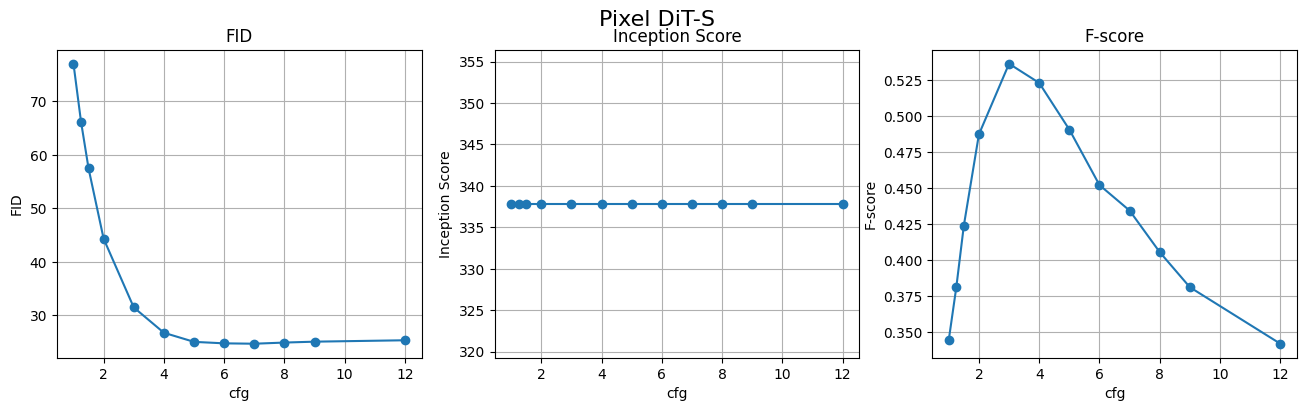

In [50]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
for i, (name, data) in enumerate([("FID", fids), ("Inception Score", inception_scores), ("F-score", fscores)]):
    ax = axes[i]
    ax.plot(data.keys(), data.values(), marker='o')
    ax.set_xlabel('cfg')
    ax.set_ylabel(name)
    ax.set_title(name)
    ax.grid()
fig.suptitle("Pixel DiT-S", fontsize=16)
plt.show()

In [51]:
pd.DataFrame({'cfg': list(fids.keys()),
            'FID': list(fids.values()),
            'Inception Score': list(inception_scores.values()),
            'F-score': list(fscores.values()),
            'Precision': list(precisions.values()),
            'Recall': list(recalls.values())
            })

,cfg,FID,Inception Score,F-score,Precision,Recall
0,1.00,76.995905,337.85376,0.344811,0.4269,0.2892
1,1.25,66.177936,337.85376,0.381323,0.4389,0.3371
2,1.50,57.449579,337.85376,0.424102,0.4561,0.3963
3,2.00,44.317812,337.85376,0.487318,0.4834,0.4913
4,3.00,31.486494,337.85376,0.536316,0.4652,0.6331
5,4.00,26.752588,337.85376,0.523013,0.4146,0.7082
6,5.00,25.055119,337.85376,0.490645,0.3650,0.7482
7,6.00,24.777300,337.85376,0.452174,0.3196,0.7727
8,7.00,24.706779,337.85376,0.434473,0.2995,0.7909
9,8.00,24.923431,337.85376,0.405624,0.2707,0.8087


In [44]:
for cfg in cfgs:
    print(f'bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 {cfg} 32 320000')

bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.0 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.25 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 2.0 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 3.0 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 4.0 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 5.0 32 320000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 1000

# remove metrics in moe experiment / ttt-b,s,ti expepriment

In [16]:
expr_name = "ttt-mlp-bd/pixels/ps2-DiT-B-mt3lm-mlp-bd-2024-Aug-31-06-25-38"
expr_name = "ttt-mlp-bd/pixels/ps2-DiT-S-mt3lm-mlp-bd-2024-Aug-31-06-31-44"
expr_name = "ttt-mlp-bd/pixels/ps2-TTT-Ti-mt3lm-mlp-bd-2024-Aug-31-06-05-11"
checkpoint_path = get_checkpoint_path(expr_name)
checkpoints = os.listdir(checkpoint_path)
# print(checkpoints)

cfg = 1.5
seed = 0
step = 50
nsmp = 10000
mode = 'rectflow'

checkpoint_wo_metric = []
checkpoint_w_metric = []
for checkpoint in os.listdir(checkpoint_path):
    sample_path = get_samples_path(expr_name, checkpoint)
    if sample_path:
        folder_suffix = f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}-{mode if mode!='ddpm' else ''}"
        metric_path = get_metric_path(sample_path, folder_suffix)
        if metric_path:
            os.remove(metric_path)
            print("removed",metric_path)
            checkpoint_w_metric.append(checkpoint)
        else:
            checkpoint_wo_metric.append(checkpoint)
print(checkpoint_wo_metric)
print(checkpoint_w_metric)

['10000', '100000', '110000', '120000', '130000', '140000', '150000', '160000', '170000', '180000', '190000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000']


In [30]:
print(f'export EXPR_NAME="{expr_name}"')
for ckpt in checkpoint_wo_metric:
    print(f'bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 {ckpt}')

export EXPR_NAME="rectflow-lognorm-zloss/latent/ps1-DiT-S-SSM-MoE-2024-Aug-30-03-03-37"
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 100000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 150000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 200000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 250000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 300000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 350000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 400000


In [62]:
expr_name = 'dit-mixprec/latent/ps1-DiT-S-2024-Sep-03-09-26-34'
checkpoint_path = get_checkpoint_path(expr_name)
checkpoints = os.listdir(checkpoint_path)
# print(checkpoints)

cfg = 1.5
seed = 0
step = 50
nsmp = 10000
mode = 'rectflow'

checkpoint_wo_metric = []
for checkpoint in os.listdir(checkpoint_path):
    sample_path = get_samples_path(expr_name, checkpoint)
    if sample_path:
        folder_suffix = f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}-{mode if mode!='ddpm' else ''}"
        metric_path = get_metric_path(sample_path, folder_suffix)
        if metric_path:
            print(metric_path)
        else:
            checkpoint_wo_metric.append(checkpoint)
print(checkpoint_wo_metric)

['100000', '125000', '150000', '175000', '200000', '225000', '25000', '250000', '275000', '300000', '325000', '350000', '375000', '399999', '50000', '75000']
export EXPR_NAME="dit-mixprec/latent/ps1-DiT-S-2024-Sep-03-09-26-34"


In [65]:
checkpoint_wo_metric = sorted(checkpoint_wo_metric, key=lambda x: int(x), reverse=True)

print(f'export EXPR_NAME="{expr_name}"')
for ckpt in checkpoint_wo_metric[::2]:
    print(f'bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 {ckpt}')
print(f'export EXPR_NAME="{expr_name}"')
for ckpt in checkpoint_wo_metric[1::2]:
    print(f'bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 {ckpt}')


export EXPR_NAME="dit-mixprec/latent/ps1-DiT-S-2024-Sep-03-09-26-34"
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 399999
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 350000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 300000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 250000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 200000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 150000
bash /mnt/disks/nfs/ujinsong/jax-DiT/scripts/autolaunch_tpu_ujinsong_eval.sh $EXPR_NAME "rectflow" 10000 50 0 256 1.5 32 100000
bash /mnt/disks/nfs/ujinsong/jax-Di

# correct train_step

In [6]:
expr_name = 'rectflow-lognorm/pixel/ps2-dstate256-DiT-Ti-SSM-2024-Aug-22-22-18-21'
sample_path = f'/mnt/disks/gs2/outputs/checkpoints/{expr_name}/samples'

cfg = 1.5
seed = 0
step = 50
nsmp = 10000
mode = 'rectflow'

sampled_ckpts = os.listdir(sample_path)
for ckpt in sampled_ckpts:
    if int(ckpt) not in [1599999, 1000000, 1120000, 1240000, 1360000, 1480000]:
        continue
    folder_suffix = f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}-{mode if mode!='ddpm' else ''}"
    metric_path = get_metric_path(os.path.join(sample_path, ckpt), folder_suffix)
    if os.path.isfile(metric_path):
        metric = np.load(metric_path, allow_pickle=True).item()
        # print(metric)
        metric['eval-10000-50/eval_steps'] = int(metric['eval-10000-50/eval_steps']/4)
        metric['eval-10000-50/train_flops_TFlops']/=4
        np.save(metric_path, metric)
        print(metric)
        print()
    else:
        print(f'No metric for {ckpt}')

{'eval-10000-50/eval_steps': 250000, 'eval-10000-50/train_flops_TFlops': 36394888.0, 'eval-10000-50/precision': 0.2347, 'eval-10000-50/recall': 0.2633, 'eval-10000-50/fid': 101.02160164096239, 'eval-10000-50/sfid': 37.45022243870778, 'eval-10000-50/inception': 337.853759765625, 'sampling_time': 0}
{'eval-10000-50/eval_steps': 280000, 'eval-10000-50/train_flops_TFlops': 40762272.0, 'eval-10000-50/precision': 0.2383, 'eval-10000-50/recall': 0.272, 'eval-10000-50/fid': 98.71928488833163, 'eval-10000-50/sfid': 36.46460272896627, 'eval-10000-50/inception': 337.853759765625, 'sampling_time': 0}
{'eval-10000-50/eval_steps': 310000, 'eval-10000-50/train_flops_TFlops': 45129660.0, 'eval-10000-50/precision': 0.2506, 'eval-10000-50/recall': 0.2821, 'eval-10000-50/fid': 95.3261349953259, 'eval-10000-50/sfid': 35.56785583206363, 'eval-10000-50/inception': 337.853759765625, 'sampling_time': 0}
{'eval-10000-50/eval_steps': 340000, 'eval-10000-50/train_flops_TFlops': 49497044.0, 'eval-10000-50/precisi